In [4]:
keyword_raw = 'cloud "phishing attack" leak malware blog incident "hacked"'

In [2]:
import cfscrape
from lxml import etree
import pandas as pd
import urllib
import re
from random import randint
from time import sleep


header = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9',
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language' : 'nl-NL,nl;q=0.8,en-US;q=0.6,en;q=0.4',
    'Cache-Control' : 'max-age=0',
    'Connection': 'keep-alive',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.81 Safari/537.36'
    }

1 https://www.google.com/search?q=cloud+%22phishing+attack%22+leak+malware+blog+incident+%22hacked%22&sxsrf=ACYBGNTPsyWyo-RXi_1Da8hJAgadrIUhUw:1579293451322&ei=CxsiXu2mE8WkwQLFgLbgBQ&start=0&sa=N&ved=2ahUKEwit2KXJvovnAhVFUlAKHUWADVwQ8tMDegQICxAy
<Element html at 0x27269dd9608>
b'<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="nl">\n<head>\n<meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image">\n<meta content="origin" name="referrer">\n<title>cloud "phishing attack" leak malware blog incident "hacked" - Google zoeken</title>\n<script nonce="uW5zdchZEGdg/NfwUsdCvA==">(function(){window.google={kEI:\'ZCUiXuSVMpHLwQKrjLbYDA\',kEXPI:\'31\',authuser:0,kGL:\'NL\',kBL:\'H9fM\'};google.sn=\'web\';google.kHL=\'nl\';google.jsfs=\'Ffpdje\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var 
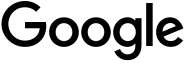
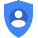

In [21]:
page = 1 
df = pd.DataFrame()
    
while True: 
    start_page = (page - 1) * 10
    #################################################################################
    keyword = urllib.parse.quote_plus(keyword_raw)
    
    url="https://www.google.com/search?q=" + keyword + "&sxsrf=ACYBGNTPsyWyo-RXi_1Da8hJAgadrIUhUw:1579293451322&ei=CxsiXu2mE8WkwQLFgLbgBQ&start="+str(start_page)+"&sa=N&ved=2ahUKEwit2KXJvovnAhVFUlAKHUWADVwQ8tMDegQICxAy"

#     url="https://scholar.google.nl/scholar?start="+str(start_page)+"&q="+keyword+"&hl=nl&as_sdt=0,5&as_ylo=2010&as_yhi="
    print(page, url)
    #################################################################################
    scraper = cfscrape.create_scraper()
    scraped_html=scraper.get(url,headers=header).content
    html = etree.HTML(scraped_html)
    print(html)
    result = etree.tostring(html, pretty_print=True, method="html")
    print(result)
    elements = html.xpath("//div[@class='gs_ri']")
    #################################################################################
    if len(elements) == 0:
        print("The code stopped for some reason!! Possibly Google blocked us!")
        print("\""+(''.join(html.xpath("//div[@id='infoDiv']/text()")))+"\"")
        break
    
    # print(scraped_html.decode("utf-8") )
#     
#     print(html)
#     #################################################################################    
#     #################################################################################
#     if len(elements) == 0:
#         print("The code stopped for some reason!! Possibly Google blocked us!")
#         print("\""+(''.join(html.xpath("//div[@id='infoDiv']/text()")))+"\"")
#         break
#     #################################################################################
#     for element in elements:
#         #################################################################################
#         if len(element.xpath("h3[@class='gs_rt']/a/text()")) > 1:
#             title = (keyword_raw+" ").join(element.xpath("h3[@class='gs_rt']/a/text()"))
#         elif len(element.xpath("h3[@class='gs_rt']/a/text()")) == 1:
#             title = element.xpath("h3[@class='gs_rt']/a/text()")[0]
#         else:
#             title = ""
#         #################################################################################    
#         link  = ''.join(element.xpath("h3[@class='gs_rt']/a/@href"))
#         #################################################################################    
#         abstract = ''.join(element.xpath("div[@class='gs_rs']/text()")).replace('\n','')
#         #################################################################################
#         reference = ''.join(element.xpath("div[@class='gs_a']/text()"))
#         #################################################################################
#         try:
#             year = re.search(r"\d{4}", reference)[0]
#         except:
#             year = ""
#         #################################################################################
#         citations = ''.join(element.xpath("div[@class='gs_fl']/a/text()")).split('Ver')[0].replace('Geciteerd door ','')
#         #################################################################################   
#         df = df.append({'citations':citations, 'year':year,'title':title,'abstract':abstract,'reference':reference,'link':link},ignore_index=True)
#     #################################################################################
# #     if page >= 20:
#         break
    print("sleeping...")
    sleep(randint(60,75))
    #################################################################################   
    page = page + 1

Save results in csv file.

In [8]:
df.to_csv('Phishing_incidents_1701.csv')

In [7]:
pd.options.display.max_colwidth = 100
from urllib.parse import urlparse

In [8]:
#Reading again the file in case it is a offline analysis
# df = pd.read_csv('googlescholar_query_cloud_security+application_20191213.csv',index_col=0).dropna()



""


In [55]:
print("TOTAL ENTRIES:",len(df))

TOTAL ENTRIES: 56


In [13]:


source_distribution = df['link'].dropna().apply(lambda x: urlparse(x)[1].replace("www.","")).value_counts()




# print("TOTAL ENTRIES:",len(df))
# print("Distinct Source of Information:",len(source_distribution))
# print("Frequency of Source of Information:")
# print(source_distribution.head(20))

print("---------------------")
print("Year distribution")
sd = df['year'].dropna().value_counts()
print("Distinct year of Information:",len(sd))
print(sd.head(15))

---------------------
Year distribution
Distinct year of Information: 21
2014    151
2015    143
2013    131
2016    124
2012    107
2017    103
2011     62
2018     38
2010     37
2019     21
1308      2
1304      2
1101      1
1108      1
1508      1
Name: year, dtype: int64


In [14]:
df[df['link'].str.contains("ieeexplore.ieee.org")].to_csv("cloud_security_ieee.csv")

In [48]:
for link in df[df['link'].str.contains("ieeexplore.ieee.org")]['link']:
    print(link)
    #################################################################################
    scraper = cfscrape.create_scraper()
    scraped_html=scraper.get(link,headers=header).content
    # print(scraped_html.decode("utf-8") )
    html = etree.HTML(scraped_html)
    #################################################################################    
    elements = html.xpath("//script[@type='text/javascript']/text()")
    abstract = elements[2].split('"abstract":"')[2].split('","')[0]
    year = elements[2].split('"dateOfInsertion":"')[1].split('","')[0]
    print(abstract)
    print(year)
    print(elements[2].split('"keywords":')[2].split('[{"type":"IEEE Keywords","kwd":[')[1].split(']}')[0])
    

https://ieeexplore.ieee.org/abstract/document/5598162/
Faced with today's innovative blow-up of cloud technologies, we are forced to rebuild services in terms of cloud. In the rebuilding, considering the facet of cloud as a social infrastructure, security is a critical problem of clouds. Most of insecurity against clouds can be summarized as social insecurity, which is classified into the multiple stakeholder problem, the open space security problem, and the mission critical data handling problem. As a solution of those problems, we propose a new cloud trust model. In our cloud trust model, in addition to conventional trust models, we consider both internal trust that is the TPM of this model, and contracted trust that controls cloud service providers under contracts and related documents. We call the cloud platform that meets the cloud trust model as “Security Aware Cloud.” In a security aware cloud, internal trust must be established as the firm base of trust. By implementing TPM of 

The key barrier to widespread uptake of cloud computing is the lack of trust in clouds by potential customers. While preventive controls for security and privacy are actively researched, there is still little focus on detective controls related to cloud accountability and audit ability. The complexity resulting from large-scale virtualization and data distribution carried out in current clouds has revealed an urgent research agenda for cloud accountability, as has the shift in focus of customer concerns from servers to data. This paper discusses key issues and challenges in achieving a trusted cloud through the use of detective controls, and presents the Trust Cloud framework, which addresses accountability in cloud computing via technical and policy-based approaches.
08 September 2011
"Cloud computing","Security","Servers","Privacy","Operating systems","Law","Monitoring"
https://ieeexplore.ieee.org/abstract/document/7019735/
Cloud computing is a service oriented concept which offers e

Today, one of the most important factors for the success of cloud computing is to create trust and security. Cloud computing will face a lot of challenges when the key element trust is absent. There are no special trust evaluation models for cloud computing environment. In this paper, the definition of trust in cloud systems is introduced and the properties of trust are analyzed. Based on the properties and semantics of trust, an extensible trust evaluation model named ETEC is proposed, which includes a time-variant comprehensive evaluation method for expressing direct trust and a space-variant evaluation method for calculating recommendation trust. To compute trust in cloud systems, an algorithm based on the ETEC model is given. Simulation and analysis shows that this model can calculate the trust degree effectively and reasonably in cloud computing environments.
12 September 2011
"Computational modeling","Program processors","Analytical models","Cryptography"
https://ieeexplore.ieee.

Cloud computing has changed the whole picture that distributed computing used to present e.g. Grid computing, server client computing. Cloud has given a new meaning to distributed, and off-premises computing. Although, Cloud offers great benefits, it also introduces a myriad of security threats to the information and data which is now being ported from on-premises to off-premises. Where cloud computing can help organizations accomplish more by paying less (in the longer run) and breaking the physical boundaries between IT infrastructure and its users, due to openness of accessible information and data relying on trust between cloud provider and customer, heightened security threats must be overcome in order to benefit fully from this new computing exemplar. Breach in the security of any component in the cloud can be both disaster for the organization (the customer) and defacing for the provider. This paper explores the security issues related to the cloud. The paper also discusses the 

Cloud computing represents today's most exciting computing paradigm shift in information technology. However, security and privacy are perceived as primary obstacles to its wide adoption. Here, the authors outline several critical security challenges and motivate further investigation of security solutions for a trustworthy public cloud environment.
09 January 2012
"Cloud computing","Privacy","Outsourcing","Network security","Cryptography","Search problems","Computer security"
https://ieeexplore.ieee.org/abstract/document/5378187/
Trust plays an important role in all commercial grid and cloud environments. It is the estimation of competence of a resource provider in completing a task based on reliability, security, capability and availability in the context of distributed environment. It enables users to select the best resources in the heterogeneous grid and cloud infrastructure. This paper introduces a novel trust model to evaluate the grid and cloud resources by means of resource br

Today large amounts of security and privacy-critical data are transferred, processed and stored in external cloud services. However, with many offerings, you need to be either an ignoramus or a daredevil to surrender such data. For the cautious, trustworthy, sufficient and credible evidence of the actual security, privacy and trust level is a prerequisite for considering cloud services for critical applications. We present results from an expert interview study investigating the needs of security, privacy and trust measurement in the cloud. Furthermore, research directions for metrics development are discussed based on the interviews.
28 October 2010
"Security","Clouds","Privacy","Measurement","Interviews","Business","Software"
https://ieeexplore.ieee.org/abstract/document/6427513/
Cloud computing is a new generation of the technology that has been designed to cater for commercial necessities and to run suitable applications or solve IT management issues. While cost and ease of use are

Cloud Computing is increasingly becoming popular as many enterprise applications and data are moving into cloud platforms. However, a major barrier for cloud adoption is real and perceived lack of security. In this paper, we take a holistic view of cloud computing security - spanning across the possible issues and vulnerabilities connected with virtualization infrastructure, software platform, identity management and access control, data integrity, confidentiality and privacy, physical and process security aspects, and legal compliance in cloud. We present our findings from the points of view of a cloud service provider, cloud consumer, and third-party authorities such as Govt. We also discuss important research directions in cloud security in areas such as Trusted Computing, Information Centric Security and Privacy Preserving Models. Finally, we sketch a set of steps that can be used, at a high level, to assess security preparedness for a business application to be migrated to cloud.


Cloud Computing is a new emerging computational model. Cloud features like rapid elasticity, pay per use, location independence, on demand infrastructure providing capability and everywhere network access are attracting both Cloud consumers and providers. But there are several concerns relating to security, privacy and trust that hinders the adoption of cloud in spite of several beneficial features. In this paper, we present a trust management architecture which consist of a Cloud Service Registry and Discovery which serves as cloud providers' registry and lists their respective trust values, a Trust Calculator that calculates CSP's trust based on feedbacks of two parameters namely SLA and QoS. A Dynamic Trust Monitor keeps watch on the deviating trust values with time and transactions.
21 March 2013
"Cloud computing","Security","Computational modeling","Quality of service","Monitoring","Computer architecture","Calculators"
https://ieeexplore.ieee.org/abstract/document/6735387/
The clo

IndexError: list index out of range